# Topic Modeling

Description
Large amounts of data are collected everyday. As more information becomes available, it becomes difficult to access what we are looking for. So, we need tools and techniques to organize, search and understand vast quantities of information.
Topic modelling provides us with methods to organize, understand and summarize large collections of textual information. It helps in:

•	Discovering hidden topical patterns that are present across the collection

•	Annotating documents according to these topics

•	Using these annotations to organize, search and summarize texts


Topic modelling can be described as a method for finding a group of words (i.e topic) from a collection of documents that best represents the information in the collection. It can also be thought of as a form of text mining – a way to obtain recurring patterns of words in textual material.
In this project we will use unsupervised techniques, to cluster/ group reviews to identify main topics/ ideas in the sea of text. This will be applicable to any textual reviews but we can focus on twitter data which is more real world and more complex than reviews obtained from review or survey forms. 


In [5]:
import nltk
import numpy as np
import re # remove regex
import pandas as pd 

%matplotlib inline

In [6]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [7]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
# raw_data  = pd.read_csv("tweets.csv",encoding = 'ISO-8859-1')
raw_data = pd.read_csv(r"C:\Users\Paul\Downloads\tweets.csv")
print(len(raw_data))

21047


In [9]:
df = raw_data

In [10]:
unique_text = df.tweet.unique()
print(len(unique_text))

21047


In [11]:
df.head(5)

username        date   
0  shivaji_takey  10-06-2020  \
1  sarasberiwala  10-06-2020   
2     chitreamod  10-06-2020   
3   sanjan_suman  10-06-2020   
4       t_nihsit  10-06-2020   

                                               tweet        mentions  
0  Please check what happens to this no 940417705...  ['vodafonein']  
1  Network fluctuations and 4G Speed is pathetic....  ['vodafonein']  
2  This has been going on since 3rd... this absol...  ['vodafonein']  
3  @VodafoneIN  I have done my recharge of 555 on...  ['vodafonein']  
4  But when???Still I am not received any call fr...  ['vodafonein']

In [12]:
df['tweet'][444]

'Can you share me good plan and can tell me how can i port my network operator'

In [13]:
# Remove certain parts from the data
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

### Remove any @ mentions

In [14]:
df['Clean_text'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df['Clean_text'].head(5)

0    Please check what happens to this no 940417705...
1    Network fluctuations and 4G Speed is pathetic....
2    This has been going on since 3rd... this absol...
3      I have done my recharge of 555 on 9709333370...
4    But when???Still I am not received any call fr...
Name: Clean_text, dtype: object

In [15]:
# Remove anything that is not a letter/string
df['Clean_text'] = df['Clean_text'].str.replace("[^a-zA-Z#]", " ")
df['Clean_text'].head(5)

0    Please check what happens to this no 940417705...
1    Network fluctuations and 4G Speed is pathetic....
2    This has been going on since 3rd... this absol...
3      I have done my recharge of 555 on 9709333370...
4    But when???Still I am not received any call fr...
Name: Clean_text, dtype: object

In [16]:
# Convert everything to the lower case
df["Clean_text"]= df["Clean_text"].str.lower() 
df['Clean_text'].head(5)

0    please check what happens to this no 940417705...
1    network fluctuations and 4g speed is pathetic....
2    this has been going on since 3rd... this absol...
3      i have done my recharge of 555 on 9709333370...
4    but when???still i am not received any call fr...
Name: Clean_text, dtype: object

In [17]:
# remove any word with a length of 2 or less (most are filler words that cannot help in grouping/clustering)
df['Clean_text'] = df['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df.head(5)

username        date   
0  shivaji_takey  10-06-2020  \
1  sarasberiwala  10-06-2020   
2     chitreamod  10-06-2020   
3   sanjan_suman  10-06-2020   
4       t_nihsit  10-06-2020   

                                               tweet        mentions   
0  Please check what happens to this no 940417705...  ['vodafonein']  \
1  Network fluctuations and 4G Speed is pathetic....  ['vodafonein']   
2  This has been going on since 3rd... this absol...  ['vodafonein']   
3  @VodafoneIN  I have done my recharge of 555 on...  ['vodafonein']   
4  But when???Still I am not received any call fr...  ['vodafonein']   

                                          Clean_text  
0  please check what happens this 9404177052 not ...  
1  network fluctuations and speed pathetic. need ...  
2  this has been going since 3rd... this absolute...  
3  have done recharge 555 9709333370 but haven't ...  
4  but when???still not received any call from cu...

In [18]:
# Tokenization
tokenized_tweet = df['Clean_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [please, check, what, happens, this, 940417705...
1    [network, fluctuations, and, speed, pathetic.,...
2    [this, has, been, going, since, 3rd..., this, ...
3    [have, done, recharge, 555, 9709333370, but, h...
4    [but, when???still, not, received, any, call, ...
Name: Clean_text, dtype: object

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['Clean_text'] = tokenized_tweet

In [19]:
df.head(10)

username        date   
0    shivaji_takey  10-06-2020  \
1    sarasberiwala  10-06-2020   
2       chitreamod  10-06-2020   
3     sanjan_suman  10-06-2020   
4         t_nihsit  10-06-2020   
5        tanzeelu3  10-06-2020   
6       chitreamod  10-06-2020   
7  mayankpatel7293  10-06-2020   
8       deeranjith  10-06-2020   
9   govindrathi799  10-06-2020   

                                               tweet   
0  Please check what happens to this no 940417705...  \
1  Network fluctuations and 4G Speed is pathetic....   
2  This has been going on since 3rd... this absol...   
3  @VodafoneIN  I have done my recharge of 555 on...   
4  But when???Still I am not received any call fr...   
5  @VodafoneIN mere area me vodafone ka network n...   
6  Thanks, but I have visited the website, called...   
7  @VodafoneIN @VodafoneGroup\nHi,\n Today my Vod...   
8  Dear Vodafone, I have already responded to you...   
9  @VodafoneIN SIR OUR MARKET AREA ME BILKUL NETW...   

                                            mentions   
0                                     ['vodafonein']  \
1                                     ['vodafonein']   
2                                     ['vodafonein']   
3                                     ['vodafonein']   
4                                     ['vodafonein']   
5                                     ['vodafonein']   
6                                     ['vodafonein']   
7  ['vodafonein', 'vodafonegroup', 'trai', 'trai_...   
8                                     ['vodafonein']   
9                                     ['vodafonein']   

                                          Clean_text  
0  please check what happens this 9404177052 not ...  
1  network fluctuations and speed pathetic. need ...  
2  this has been going since 3rd... this absolute...  
3  have done recharge 555 9709333370 but haven't ...  
4  but when???still not received any call from cu...  
5  mere area vodafone network nai raha hai bhitol...  
6  thanks, but have visited the website, called y...  
7  hi, today vodafone cim deactivated without any...  
8  dear vodafone, have already responded your rep...  
9  sir our market area bilkul network nahi raha h...

In [20]:
df.loc[:,('Clean_text')].head(10)

0    please check what happens this 9404177052 not ...
1    network fluctuations and speed pathetic. need ...
2    this has been going since 3rd... this absolute...
3    have done recharge 555 9709333370 but haven't ...
4    but when???still not received any call from cu...
5    mere area vodafone network nai raha hai bhitol...
6    thanks, but have visited the website, called y...
7    hi, today vodafone cim deactivated without any...
8    dear vodafone, have already responded your rep...
9    sir our market area bilkul network nahi raha h...
Name: Clean_text, dtype: object

In [21]:
# drop duplicates from Clean_text
df.drop_duplicates(subset=['Clean_text'], keep = 'first',inplace= True)

In [22]:
df.reset_index(drop=True,inplace=True)

In [24]:
df.head(5)

username        date   
0  shivaji_takey  10-06-2020  \
1  sarasberiwala  10-06-2020   
2     chitreamod  10-06-2020   
3   sanjan_suman  10-06-2020   
4       t_nihsit  10-06-2020   

                                               tweet        mentions   
0  Please check what happens to this no 940417705...  ['vodafonein']  \
1  Network fluctuations and 4G Speed is pathetic....  ['vodafonein']   
2  This has been going on since 3rd... this absol...  ['vodafonein']   
3  @VodafoneIN  I have done my recharge of 555 on...  ['vodafonein']   
4  But when???Still I am not received any call fr...  ['vodafonein']   

                                          Clean_text  
0  please check what happens this 9404177052 not ...  
1  network fluctuations and speed pathetic. need ...  
2  this has been going since 3rd... this absolute...  
3  have done recharge 555 9709333370 but haven't ...  
4  but when???still not received any call from cu...

In [25]:
df['Clean_text_length'] = df['Clean_text'].apply(len)
df.head(5)

username        date   
0  shivaji_takey  10-06-2020  \
1  sarasberiwala  10-06-2020   
2     chitreamod  10-06-2020   
3   sanjan_suman  10-06-2020   
4       t_nihsit  10-06-2020   

                                               tweet        mentions   
0  Please check what happens to this no 940417705...  ['vodafonein']  \
1  Network fluctuations and 4G Speed is pathetic....  ['vodafonein']   
2  This has been going on since 3rd... this absol...  ['vodafonein']   
3  @VodafoneIN  I have done my recharge of 555 on...  ['vodafonein']   
4  But when???Still I am not received any call fr...  ['vodafonein']   

                                          Clean_text  Clean_text_length  
0  please check what happens this 9404177052 not ...                 81  
1  network fluctuations and speed pathetic. need ...                 80  
2  this has been going since 3rd... this absolute...                 64  
3  have done recharge 555 9709333370 but haven't ...                218  
4  but when???still not received any call from cu...                 77

In [26]:
df[df['Clean_text_length']==0]

username        date        tweet                       mentions   
20  omanmessi  10-06-2020  @VodafoneIN  ['ooredoooman', 'vodafonein']  \

   Clean_text  Clean_text_length  
20                             0

In [27]:
raw_data[raw_data['username']=='omanmessi']

username        date        tweet                       mentions   
20  omanmessi  10-06-2020  @VodafoneIN  ['ooredoooman', 'vodafonein']  \

   Clean_text  Clean_text_length  
20                             0

In [28]:
df[df['Clean_text_length']==0]['Clean_text'] ## Looks like these are tweets with different languages or just hastags.
# We can simply drop these tweets
indexes = df[df['Clean_text_length']==0]['Clean_text'].index
indexes

20    
Name: Clean_text, dtype: object

Index([20], dtype='int64')

In [29]:
df.drop(index = indexes,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20732 entries, 0 to 20732
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           20732 non-null  object
 1   date               20732 non-null  object
 2   tweet              20732 non-null  object
 3   mentions           20732 non-null  object
 4   Clean_text         20732 non-null  object
 5   Clean_text_length  20732 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [31]:
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20732 entries, 0 to 20731
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           20732 non-null  object
 1   date               20732 non-null  object
 2   tweet              20732 non-null  object
 3   mentions           20732 non-null  object
 4   Clean_text         20732 non-null  object
 5   Clean_text_length  20732 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 971.9+ KB


In [32]:
df['Clean_text'].head()

0    please check what happens this 9404177052 not ...
1    network fluctuations and speed pathetic. need ...
2    this has been going since 3rd... this absolute...
3    have done recharge 555 9709333370 but haven't ...
4    but when???still not received any call from cu...
Name: Clean_text, dtype: object

## Vectorizer

TfidfVectorizer:

Convert a collection of raw documents to a matrix of TF-IDF features.
In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.


CountVectorizer:

Convert a collection of text documents to a matrix of token counts
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary\
Number of features will be equal to the vocabulary size found by analyzing the data.

In [33]:
# Import sklearn features
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer='word',ngram_range=(1,1), stop_words='english', min_df = 0.0001, max_df=0.7)
count_vect.fit(df['Clean_text'])
desc_matrix = count_vect.transform(df["Clean_text"])
desc_matrix

CountVectorizer(max_df=0.7, min_df=0.0001, stop_words='english')

<20732x5326 sparse matrix of type '<class 'numpy.int64'>'
	with 206624 stored elements in Compressed Sparse Row format>

In [34]:
# 
desc_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
desc_matrix.shape

(20732, 5326)

## Clustering

In [37]:
!pip3 install KMeans
!pip3 install wordcloud

  Using cached kmeans-1.0.2.tar.gz (5.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for KMeans
Failed to build KMeans


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [19 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\kmeans
  copying kmeans\performance.py -> build\lib.win-amd64-cpython-311\kmeans
  copying kmeans\tests.py -> build\lib.win-amd64-cpython-311\kmeans
  copying kmeans\__init__.py -> build\lib.win-amd64-cpython-311\kmeans
  running egg_info
  writing kmeans.egg-info\PKG-INFO
  writing dependency_links to kmeans.egg-info\dependency_links.txt
  writing top-level names to kmeans.egg-info\top_level.txt
  reading manifest file 'kmeans.egg-info\SOURCES.txt'
  writing manifest file 'kmeans.egg-info\SOURCES.txt'
  copying kmeans\lib.c -> build\lib.win-amd64-cpython-311\kmeans
  running build_ext
  building 'kmeans/lib' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Mic

In [38]:
from sklearn.cluster import KMeans
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt

In [39]:
# Try with two clusters
num_clusters = 2
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

KMeans(n_clusters=2)

In [40]:
tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters])
frame.head(5)

Tweet  Cluster
1  please check what happens this 9404177052 not ...        1
0  network fluctuations and speed pathetic. need ...        0
1  this has been going since 3rd... this absolute...        1
1  have done recharge 555 9709333370 but haven't ...        1
1  but when???still not received any call from cu...        1

In [41]:
frame.head(5)

Tweet  Cluster
1  please check what happens this 9404177052 not ...        1
0  network fluctuations and speed pathetic. need ...        0
1  this has been going since 3rd... this absolute...        1
1  have done recharge 555 9709333370 but haven't ...        1
1  but when???still not received any call from cu...        1

In [42]:
frame['Cluster'].value_counts()

Cluster
1    16980
0     3752
Name: count, dtype: int64

In [43]:
cluster_0=frame[frame['Cluster'] == 0]
cluster_0.head(5)

Tweet  Cluster
0  network fluctuations and speed pathetic. need ...        0
0  mere area vodafone network nai raha hai bhitol...        0
0  hi, today vodafone cim deactivated without any...        0
0  dear vodafone, have already responded your rep...        0
0  vodafone netwrk worst ever...using from many y...        0

In [44]:
def wordcloud(cluster):
  # combining the image with the dataset
  Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

  # We use the ImageColorGenerator library from Wordcloud 
  # Here we take the color of the image and impose it over our wordcloud
  image_colors = ImageColorGenerator(Mask)

  # Now we use the WordCloud function from the wordcloud library 
  wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(cluster)

  # Size of the image generated 
  plt.figure(figsize=(10,20))

  # Here we recolor the words from the dataset to the image's color
  # recolor just recolors the default colors to the image's blue color
  # interpolation is used to smooth the image generated 
  plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

  plt.axis('off')
  plt.show()

In [45]:
cluster_0_words = ' '.join(text for text in cluster_0['Tweet'])

Cluster 0: Tells about the problems related to services - !! Different clusers are formed each time!!

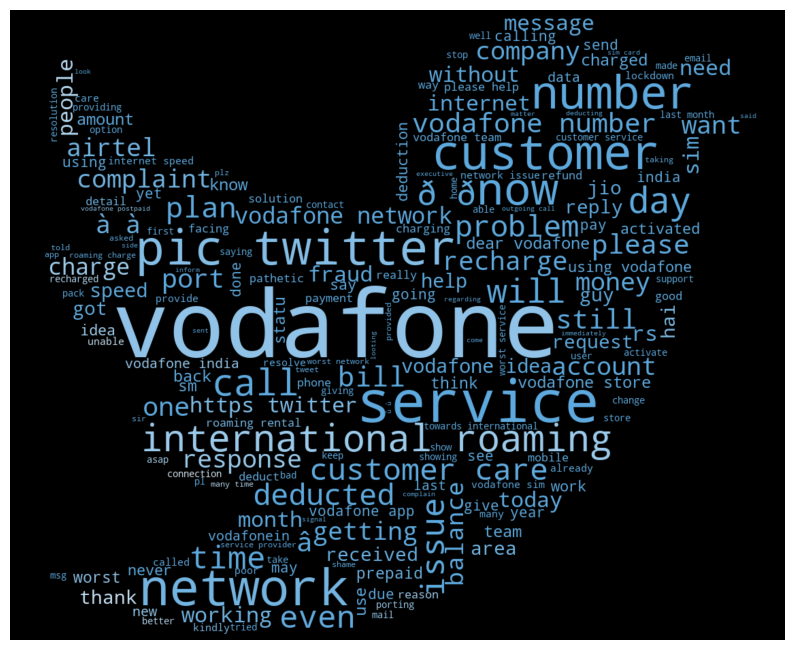

In [46]:
wordcloud(cluster_0_words)

In [47]:
cluster_1=frame[frame['Cluster'] == 1]

In [48]:
cluster_1.head(5)

Tweet  Cluster
1  please check what happens this 9404177052 not ...        1
1  this has been going since 3rd... this absolute...        1
1  have done recharge 555 9709333370 but haven't ...        1
1  but when???still not received any call from cu...        1
1  thanks, but have visited the website, called y...        1

In [49]:
cluster_1_words = ' '.join(text for text in cluster_1['Tweet'])


cluster 1: tells about the problems about renatal amount

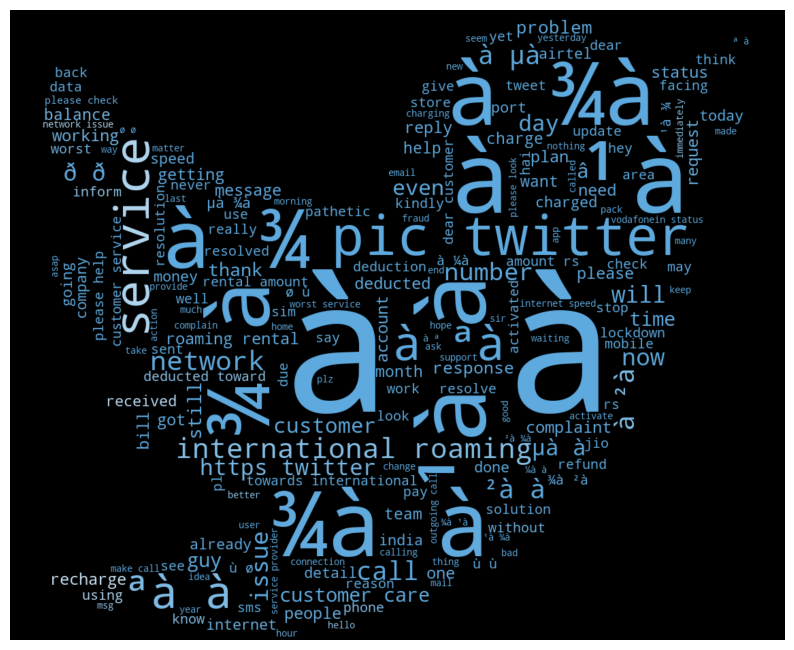

In [50]:
wordcloud(cluster_1_words)

The topics in one of the clusters is all over the place. Let us create a more detailed clusters

In [51]:
# Using 8 clusters
num_clusters = 8
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

KMeans()

In [52]:
tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters])
frame.head()

Tweet  Cluster
6  please check what happens this 9404177052 not ...        6
4  network fluctuations and speed pathetic. need ...        4
6  this has been going since 3rd... this absolute...        6
6  have done recharge 555 9709333370 but haven't ...        6
6  but when???still not received any call from cu...        6

In [53]:
frame['Cluster'].value_counts()

Cluster
6    9127
1    3277
3    2146
4    2135
2    1737
0    1565
7     561
5     184
Name: count, dtype: int64

In [54]:
cluster_0=frame[frame['Cluster'] == 0]
cluster_0

Tweet  Cluster
0  could you please help get mnp disaster #airtel...        0
0  https://www.google.com/amp/s/www.thehindubusin...        0
0  last month was charged for international roami...        0
0  proper response the private message. your solu...        0
0     had been charged inr for international roaming        0
0  have lots time request you for chang plan 299/...        0
0  currently international roaming and just switc...        0
0  just check outgoing sms issue you took days re...        0
0  with the nb-iot roaming agreement between and ...        0
0  they are looters. there should international r...        0
0  why discriminate between roaming and non-roami...        0
0  why getting charged â¹149 for international r...        0
0  dear sir, number has been blocked for all serv...        0
0  hello without international roaming services c...        0
0  got wrongly charged for international roaming....        0
0  what the hell this...you deducted rs. for inte...        0
0  hi.. i'm unable use text message (sms) service...        0
0  have been charged international roaming for ja...        0
0  refer recent complaint 4-67782821873 where cha...        0
0  #idea 9876015126 international roaming not rec...        0
0  can you please check why international roaming...        0
0  number have not messaged earlier that reason c...        0
0  and just add bit more, these guys are offering...        0
0  along with the other amount loose terms such l...        0
0  still haven't got back for some non existent i...        0
0  there emergency and could not enable internati...        0
0  vodafone has been charging 599/- its customer ...        0
0  had sent direct message regarding the issue vo...        0
0  "dear customer, this inform you that rental am...        0
0  being charged 150/- extra for international ro...        0
0  hi, using vodafone international roaming since...        0
0  this about international roaming charges was s...        0
0  â¹99/deducted frm mob a/c which had got recha...        0
0  why have been charged rental plan rs. 249 when...        0
0  hi, even iâve been charged this rental 99rs....        0
0  why you lie got call from vodafone activate in...        0
0  when are you refunding the completely illegal ...        0
0  don't think vodafone committed they are rog th...        0
0  you are charging for international roaming was...        0
0  dear team want discuss withâ you about payment...        0
0  what you have deducted amount for internationa...        0
0  look like every companies tring recover their ...        0
0  you guys deducted inr without consent even tho...        0
0  it's sorted now. rs. was deducted from vodafon...        0
0  why did you deduct â¹99 international roaming...        0
0  have been charged international roaming since ...        0
0  again rs. 19/- deducted. previous rs. 49/- rs....        0
0  there seems deduction prepaid number which hav...        0
0  dear customer, this inform you that rental amo...        0
0  also charged with international sms pack for 9...        0
0  have got below sms where have not availed aske...        0
0  thanks for solving issue international roaming...        0
0  why has rs.99 been deducted from mobile plan w...        0
0  sala ghar bahar nikal rehe nhi hai loog intern...        0
0  want get clear answer regarding this. pick cal...        0
0  why have been charged international roaming re...        0
0           international roaming debit rs. vodafone        0
0  thatâs why moved before flying. internationa...        0
0  vodafone number 9537018709, june 2020 03:29 am...        0
0  vodafone number +919537018709, june 2020 03:29...        0
0  have never seen cheater like you, during this ...        0
0  vodafone have never seen cheater like you, dur...        0
0  same problem facing number 9833567525. you ded...        0
0  have been charged 99â¹ for international roam...        0
0  team, have dme

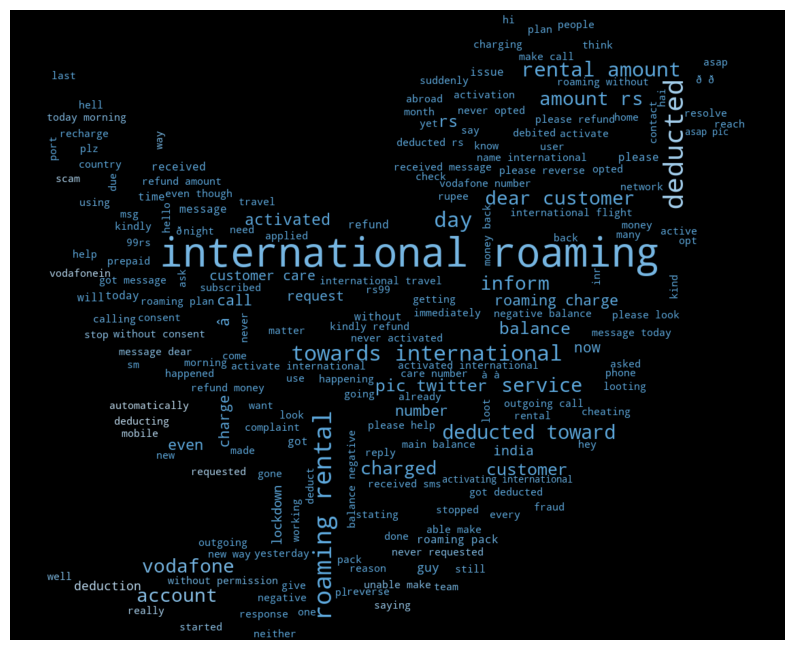

In [55]:
cluster_0=frame[frame['Cluster'] == 0]
cluster_0_words = ' '.join(text for text in cluster_0['Tweet'])
wordcloud(cluster_0_words)

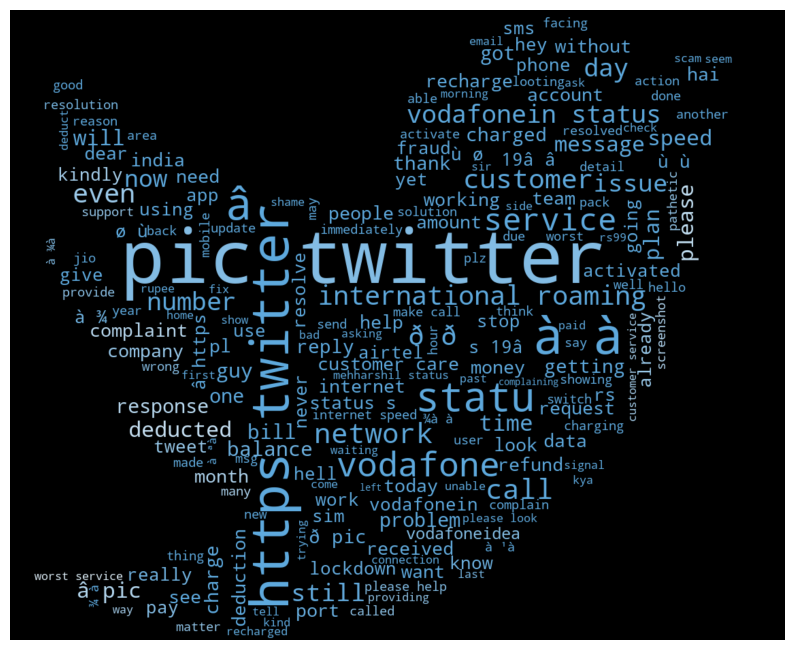

In [56]:
cluster_1=frame[frame['Cluster'] == 1]
cluster_1_words = ' '.join(text for text in cluster_1['Tweet'])
wordcloud(cluster_1_words)

In [59]:
cluster_2=frame[frame['Cluster'] == 2]

In [60]:
frame[frame['Cluster'] == 2].head(5)

Tweet  Cluster
2  not buy internet service from you broad band a...        2
2  11th consecutive day still issue same. worst s...        2
2  would expect brand like vodafone with good cus...        2
2  far one called get the feedback. this the kind...        2
2  did not subscribe for any re.1 service!! didn'...        2

In [61]:
cluster_2_words = ' '.join(text for text in cluster_2['Tweet'])

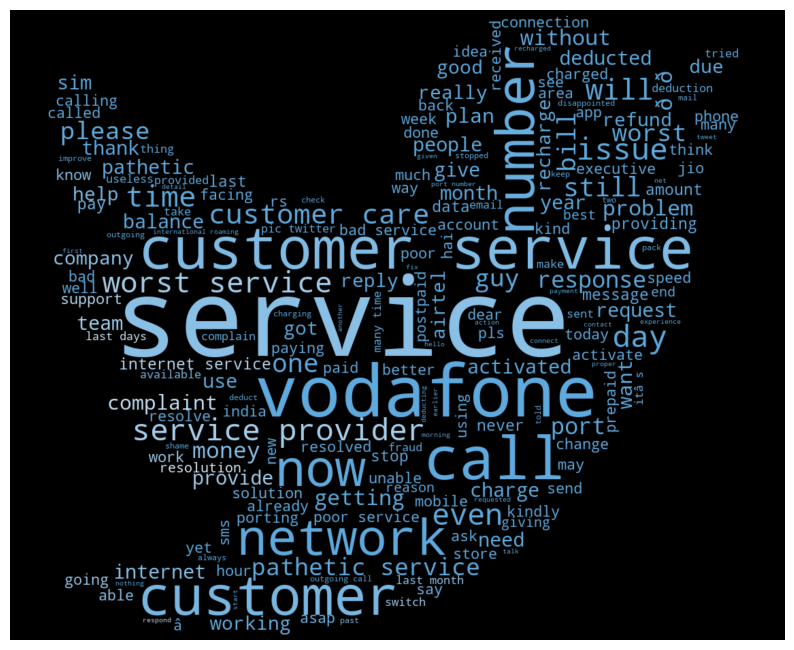

In [62]:
wordcloud(cluster_2_words)

In [63]:
cluster_3=frame[frame['Cluster'] == 3]

In [64]:
frame[frame['Cluster'] == 3].head(5)

Tweet  Cluster
3  hi, today vodafone cim deactivated without any...        3
3  dear vodafone, have already responded your rep...        3
3  vodafone netwrk worst ever...using from many y...        3
3  please help with the exact process changing ow...        3
3  someone has misused documents get sim card and...        3

In [65]:
cluster_3_words = ' '.join(text for text in cluster_3['Tweet'])

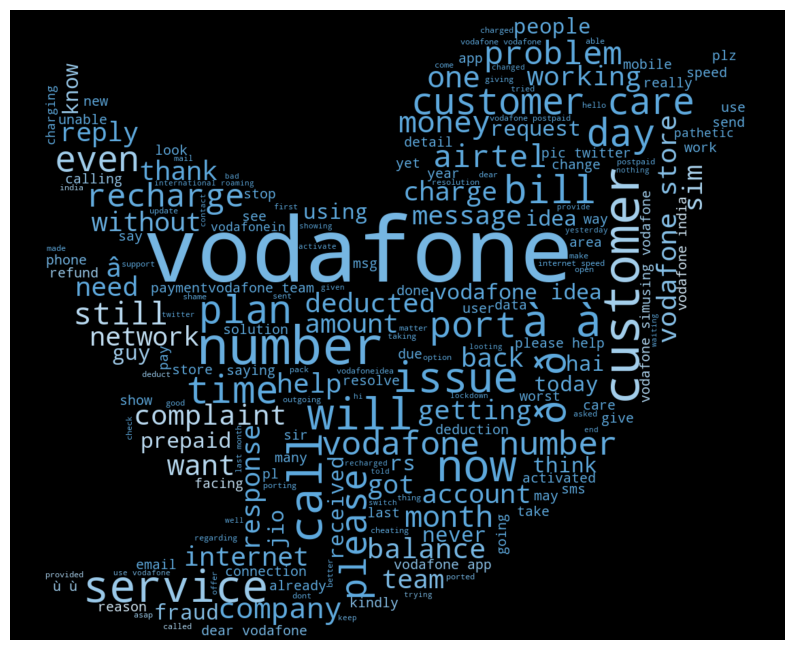

In [66]:
wordcloud(cluster_3_words)

In [67]:
cluster_4=frame[frame['Cluster'] == 4]

In [68]:
frame[frame['Cluster'] == 4].head(5)

Tweet  Cluster
4  network fluctuations and speed pathetic. need ...        4
4  mere area vodafone network nai raha hai bhitol...        4
4  sir our market area bilkul network nahi raha h...        4
4  when can assure your customers that service wi...        4
4       gonna port into network hope works out well!        4

In [69]:
cluster_4_words = ' '.join(text for text in cluster_4['Tweet'])

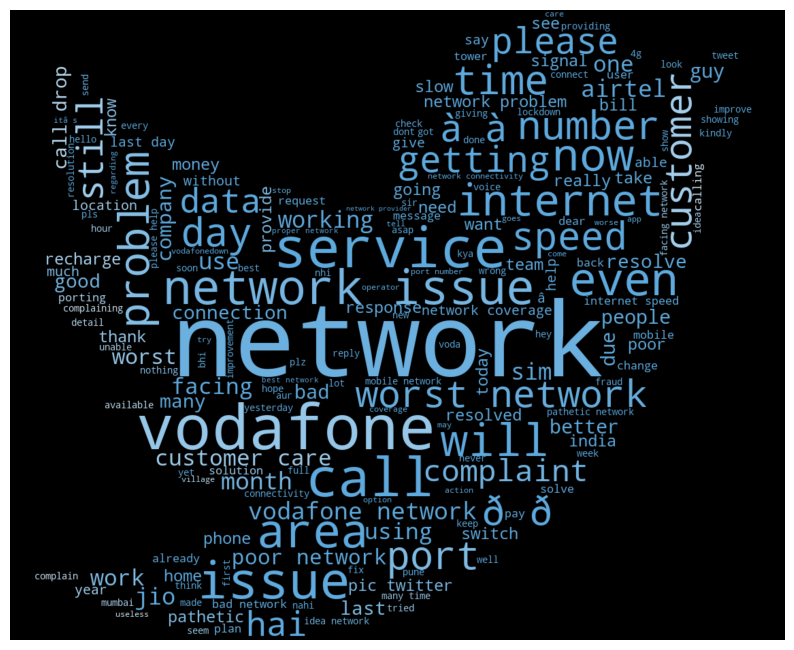

In [70]:
wordcloud(cluster_4_words)

In [71]:
cluster_5=frame[frame['Cluster'] == 5]

In [72]:
frame[frame['Cluster'] == 5].head(5)

Tweet  Cluster
5  à¤µà¥à¤¡à¤¾à¤«à¥à¤¨ à¤¸à¥à¤ªà¤° à¤¨à¥à¤à¤...        5
5  à¤µà¤¾à¤²à¥ à¤à¤² à¤à¥à¤¨à¥à¤à¥à¤à¥à¤...        5
5  à¤à¤ª à¤¸à¤¿à¤°à¥à¤«à¤¼ à¤¦à¤¿à¤²à¤¾à¤¸à¤¾ à...        5
5  à¤à¤¯à¤°à¤à¥à¤² à¤à¤° à¤µà¥à¤¡à¤¾ à¤¸à¤­à...        5
5  à¤à¥à¤ issue à¤¨à¤¹à¥ à¤¸à¥ à¤¹à¥ à¤ªà¥...        5

In [73]:
cluster_5_words = ' '.join(text for text in cluster_5['Tweet'])

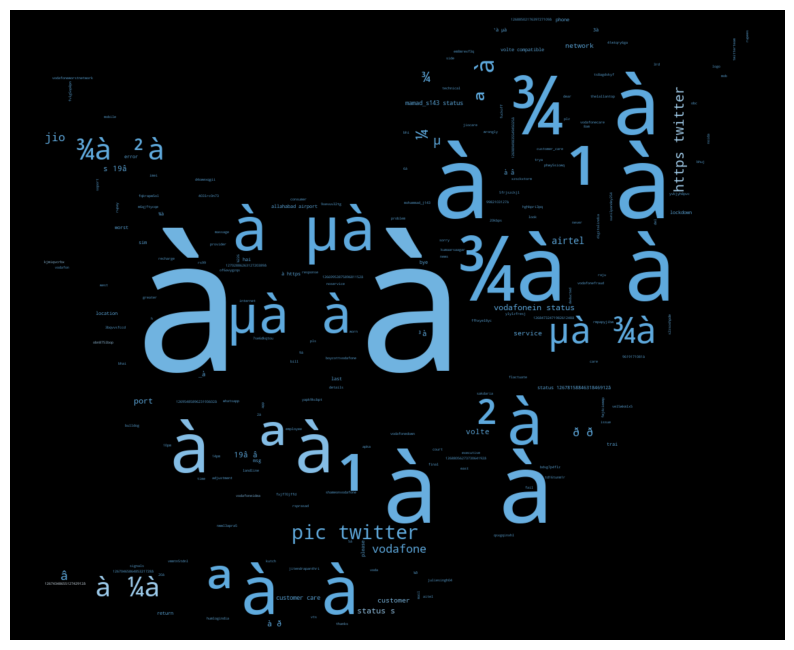

In [74]:
wordcloud(cluster_5_words)

In [75]:
cluster_6=frame[frame['Cluster'] == 6]

In [77]:
frame[frame['Cluster'] == 6].head(5)

Tweet  Cluster
6  please check what happens this 9404177052 not ...        6
6  this has been going since 3rd... this absolute...        6
6  have done recharge 555 9709333370 but haven't ...        6
6  but when???still not received any call from cu...        6
6  thanks, but have visited the website, called y...        6

In [72]:
cluster_6_words = ' '.join(text for text in cluster_6['Tweet'])

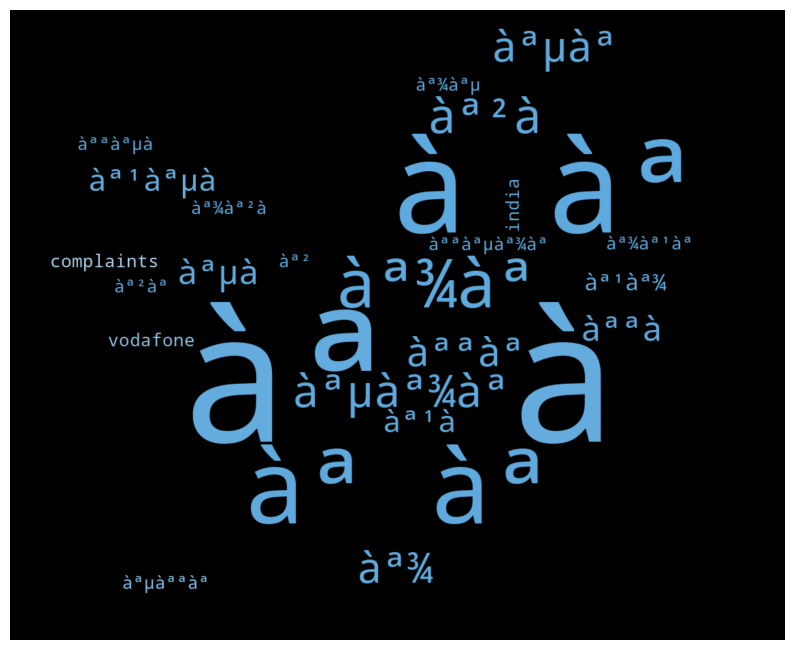

In [73]:
wordcloud(cluster_6_words)

In [74]:
cluster_7=frame[frame['Cluster'] == 7]

In [75]:
frame[frame['Cluster'] == 7]

Tweet  Cluster
7  à¤µà¥à¤¡à¤¾à¤«à¥à¤¨ à¤¸à¥à¤ªà¤° à¤¨à¥à¤à¤...        7
7  à¤µà¤¾à¤²à¥ à¤à¤² à¤à¥à¤¨à¥à¤à¥à¤à¥à¤...        7
7  à¤à¤ª à¤¸à¤¿à¤°à¥à¤«à¤¼ à¤¦à¤¿à¤²à¤¾à¤¸à¤¾ à...        7
7  à¤à¤¯à¤°à¤à¥à¤² à¤à¤° à¤µà¥à¤¡à¤¾ à¤¸à¤­à...        7
7  à¤à¥à¤ issue à¤¨à¤¹à¥ à¤¸à¥ à¤¹à¥ à¤ªà¥...        7
7  à¤¤à¥à¤®à¤à¥ à¤¸à¥à¤µà¤¾ à¤à¤¾à¤à¤à¤²à¥...        7
7  à¤à¤¸à¥à¤à¤®à¤° à¤à¤¿à¤¤à¤¨à¥ à¤¦à¤¿à¤¨à¥...        7
7  à¤µà¥à¤¡à¤¾à¤«à¥à¤¨ à¤à¥ à¤à¤°à¥à¤®à¤à¤...        7
7  à¤®à¥ à¤¸à¤¤à¥à¤¯ à¤¤à¥ à¤¸à¤¾à¤à¤à¤¤ à¤...        7
7  à¤µà¥à¤¹à¥à¤¡à¤¾à¤«à¥à¤¨ à¤¬à¤¿à¤² à¤­à¤°à¤...        7
7  à¤à¤ª à¤à¥ à¤à¤¸à¥à¤à¤®à¤° à¤à¥à¤¯à¤° ...        7
7  à¤®à¤¿à¤¥à¤¿à¤²à¤¾à¤à¥à¤·à¥à¤¤à¥à¤° à¤®à¥...        7
7  à¤µà¥à¤¹à¥à¤¡à¤¾à¤«à¥à¤¨ à¤¬à¤¿à¤² à¤­à¤°à¤...        7
7  à¤²à¤¾à¤à¤¡à¤¾à¤à¤¨-à¤ à¤¨à¤²à¤¾à¤-à¤­à¤à¤...        7
7  à¦­à§à¦¡à¦¾à¦«à§à¦¨ à¦à§à¦®à§à¦ªà¦¾à¦¨à¦¿...        7
7  à¤à¥à¤¯à¥à¤ à¤¬à¥ à¤²à¤µà¤¡à¥? à¤¬à¤¹à¥...        7
7  à¤¯à¤¾à¤° à¤¤à¥à¤® à¤à¥à¤²à¥à¤à¥à¤® à¤µà...        7
7  à¤¸à¤­à¥ à¤²à¥à¤à¥à¤ à¤¸à¥ à¤¨à¥à¤°à¥à...        7
7  à¤µà¤¾à¤°à¤à¤µà¤¾à¤° à¤¤à¤à¥à¤°à¤¾à¤° à¤à¤...        7
7  à¤¸à¤¿à¤® à¤¬à¤à¤§ à¤¹à¥à¤¨à¥ à¤à¥ à¤à¤¾...        7
7  à¤®à¤¹à¤¾ à¤à¤à¤¿à¤¯à¤¾ à¤¬à¥à¤¶à¤°à¥à¤® à...        7
7  à¤²à¥à¤ à¤¡à¤¾à¤à¤¨ à¤®à¥à¤ à¤à¤ª à¤²à¥...        7
7  à¤à¤ª à¤²à¥à¤à¥ à¤à¥ à¤à¤¾à¤à¤® à¤¦à¥...        7
7  à¤¨à¤®à¤¸à¥à¤¤à¥ à¤à¥ à¤à¤ª à¤¸à¥ à¤¨à¤¿...        7
7  à¤à¤¸ à¤¸à¤®à¤¯ à¤à¤¾ à¤¨à¥à¤à¤µà¤°à¥à¤ ...        7
7  à¤¯à¥ à¤¤à¥à¤¨ à¤¸à¥à¤à¥à¤°à¥à¤¨à¤¶à¥à¤...        7
7  à¤µà¤¾à¤à¤ à¤à¥ à¤¨à¥à¤à¤µà¤°à¥à¤ à¤à...        7
7  à¤®à¥à¤à¤¨à¥ à¤à¤¤à¤¨à¥ à¤­à¤¿à¤à¤¾à¤°à¥...        7
7  à¤¸à¤¹à¤®à¤¤ à¤¬à¤¾à¤¨à¥ à¤­à¥à¤¯à¤¾à¥¤ à¤¹à...        7
7  à¤¯à¥ à¤¸à¤®à¤¸à¥à¤¯à¤¾ à¤¬ à¤®à¥à¤°à¥ à¤µ...        7
7  à¤ªà¥à¤°à¤¿à¤¯ à¤µà¥à¤¡à¤¾à¤«à¤¼à¥à¤¨ à¤¨à¥...        7
7  à¤à¤² à¤°à¤¾à¤¤ à¤¸à¥ à¤¨à¥à¤ à¤¨à¤¹à¥à¤...        7
7  à¤à¤° à¤à¤¸à¥à¤à¤®à¤° à¤¸à¤°à¥à¤µà¤¿à¤¸ à...        7
7  à¤¡à¤¿à¤¯à¤° à¤µà¤¾à¤²à¥à¤ à¤à¤¸à¥à¤à¤®à¤...        7
7  à¤à¤ªà¤à¥ à¤¦à¥à¤µà¤¾à¤°à¤¾ à¤­à¥ à¤¤à¤ ...        7
7  à¤°à¥ à¤¨à¤¹à¥ à¤­à¤¾à¤ à¤à¤° à¤ªà¤° à¤¬à¤...        7
7  à¤¹à¤®à¥à¤ à¤­à¥ à¤²à¤ à¤°à¤¹à¤¾ à¤¹à¥ à¤...        7
7  à¤ªà¤¿à¤à¤²à¥ à¤¦à¤¿à¤¨à¥à¤ à¤¸à¥ à¤µà¥à...        7
7  à¤®à¥ à¤¤à¥ à¤¥à¤ à¤à¥à¤à¤¾ à¤¹à¥à¤ à¤...        7
7  à¤«à¤¼à¤°à¤µà¤°à¥,à¤®à¤¾à¤°à¥à¤ à¤ªà¥à¤°à¥...        7
7  à¤à¤¬ à¤¤à¤ à¤²à¤¾à¤à¤ à¤°à¤¹à¤¤à¥ à¤¹à¥...        7
7  à¤®à¤¹à¤°à¤¾à¤à¤à¤à¤ à¤ªà¤°à¤¤à¤¾à¤µà¤² à¤...        7
7  à¤à¤ªà¤¨à¥ à¤¤à¥à¥à¤à¥à¤¨à¥à¤²à¥à¤à¥...        7
7  à¤®à¥à¤°à¤¾ à¤®à¥à¤¬à¤¾à¤à¤² à¤¨à¤à¤¬à¤° 1...        7
7  à¤¹à¤® à¤à¤ªà¤à¥ à¤à¤¤à¤¿à¤® à¤à¤à¤à¥ ...        7
7  à¤®à¤¹à¥à¤¦à¤¯ à¤®à¥à¤à¤¨à¥ à¤ªà¤¨à¤¾ à¤®à...        7
7  à¤¸à¤°à¥ à¤¯à¤¹à¤¾à¤ à¤ªà¤° à¤¸à¤­à¥ à¤à¥...        7
7  à¤­à¤¾à¤ à¤¯à¥ à¤à¥à¤° à¤à¤à¤ªà¤¨à¥ à¤¹...        7
7  à¤®à¥à¤°à¥ à¤ªà¤¾à¤¸ à¤¸à¤¾à¤°à¥ à¤¸à¤¿à¤® ...        7
7  à¤¬à¤¹à¥à¤¤ à¤¹à¥ à¤à¤à¤¿à¤¯à¤¾ à¤à¤®à¥à...        7
7  à¤¬à¥à¤à¤¾ à¤ªà¤¾à¤ªà¤¾ à¤à¤ª à¤à¤¾ à¤¨à¤...        7
7  à¤µà¥à¤¡à¤¾à¤«à¥à¤¨ à¤®à¥à¤¬à¤¾à¤à¤² à¤¨à¥...        7
7  à¤à¤¬ à¤¹à¥à¤à¤¾ à¤¯à¤¾ à¤¨à¤¹à¥à¤ à¤¹à¥...        7
7  à¤¯à¥ à¤¹à¥ à¤à¥à¤°à¤¾à¤® à¤¸à¤à¤¡à¤°à¤¿à...        7
7  à¤¨à¥à¤à¤µà¤°à¥à¤ à¤¬à¥à¤¹à¤¦ à¤à¤°à¥à¤...        7
7  à¤à¤ à¤®à¥à¤à¥ à¤µà¥à¤¡à¤¾à¤«à¥à¤¨ à¤¸à...        7
7  à¤à¥à¤²à¥à¤à¥à¤® à¤à¤à¤ªà¤¨à¤¿à¤¯à¥à¤...        7
7  à¤¬à¥à¤¶à¤°à¥à¤® à¤®à¤ 2021 à¤¤à¤ à¤¸à¤®à¤...        7
7  à¤µà¥à¤¡à¤¾à¤«à¥à¤¨ à¤µà¤¾à¤²à¥ à¤à¤¾ à¤¯à...        7
7  à¤®à¥ à¤¡à¤®, à¤¤à¥à¤®à¥à¤¹à¥ à¤à¤°à¤¾ à¤...        7
7  à¤à¤¬ à¤¹à¤®à¤¾à¤°à¤¾ à¤°à¤¿à¤à¤¾à¤°à¥à¤ à...        7
7  à¤®à¥à¤°à¤¾ à¤®à¥à¤¬à¤¾à¤à¤² à¤«à¥à¤¨ à¤¨à...        7
7  à¤­à¤¾à¤ à¤à¤ª à¤à¤²à¤¤ à¤à¤à¤¹ à¤«à¤à¤¸...        7
7  à¤à¥à¤ à¤¨à¤¹à¥ à¤¹à¥ à¤°à¤¹à¤¾ à¤¹à¥ à¤...        7
7  à¤¸à¤°à¥à¤µà¤

In [76]:
cluster_7_words = ' '.join(text for text in cluster_7['Tweet'])

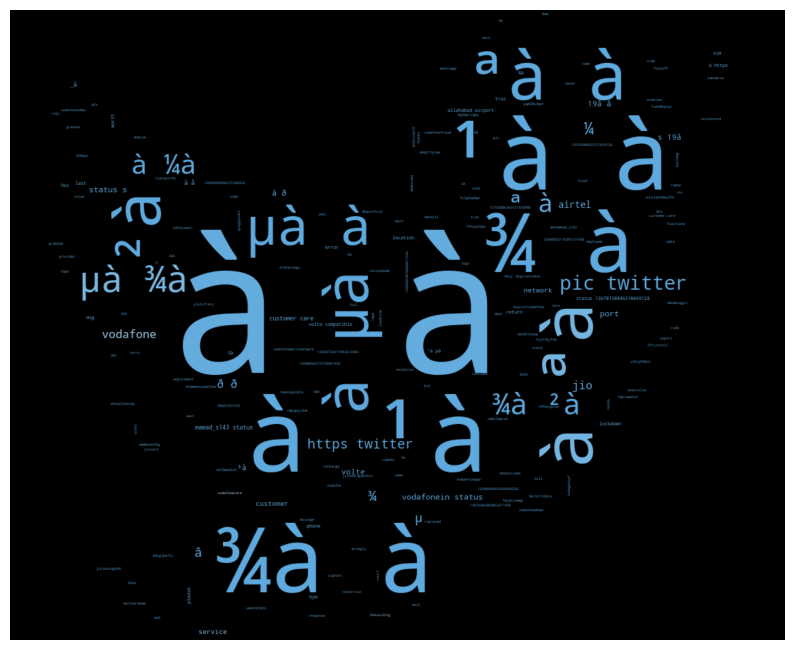

In [77]:
wordcloud(cluster_7_words)

In [78]:
frame.to_csv('clustered_tweets.csv') 

In [79]:
def identify_topics(df, desc_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters)
    km.fit(desc_matrix)
    clusters = km.labels_.tolist()
    tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
    frame = pd.DataFrame(tweets, index = [clusters])
    print(frame['Cluster'].value_counts())

    
    for cluster in range(num_clusters):
        cluster_words = ' '.join(text for text in frame[frame['Cluster'] == cluster]['Tweet'])
        wordcloud(cluster_words)
        


Cluster
1    14987
3     3502
2     1656
0      587
Name: count, dtype: int64


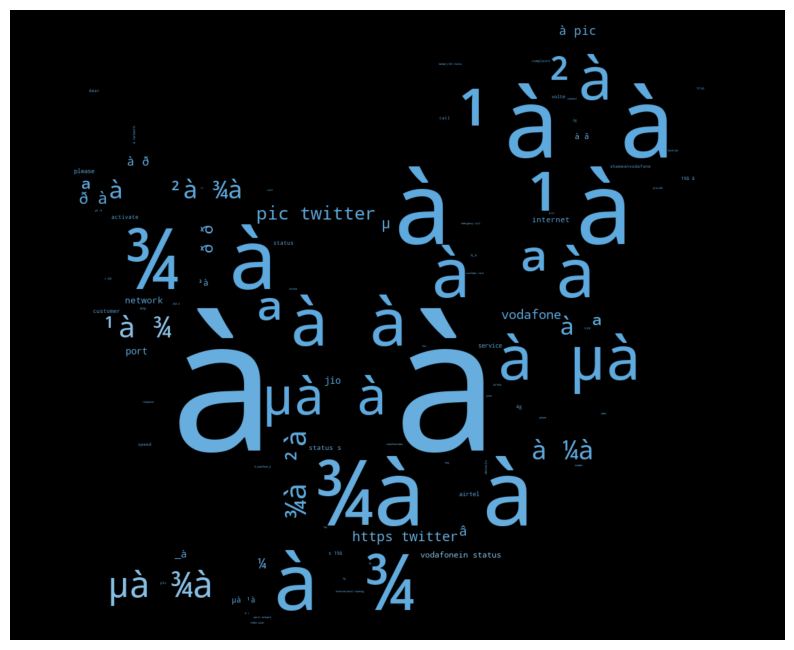

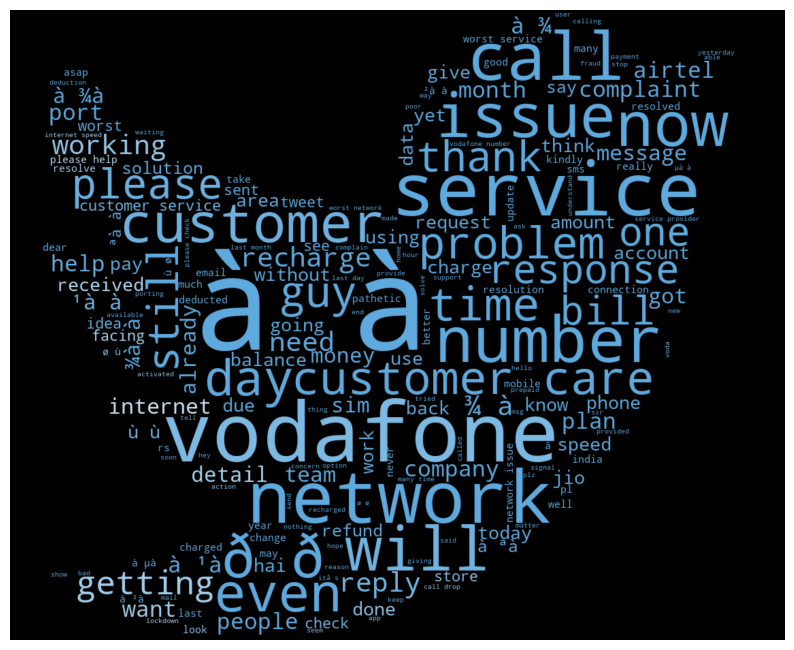

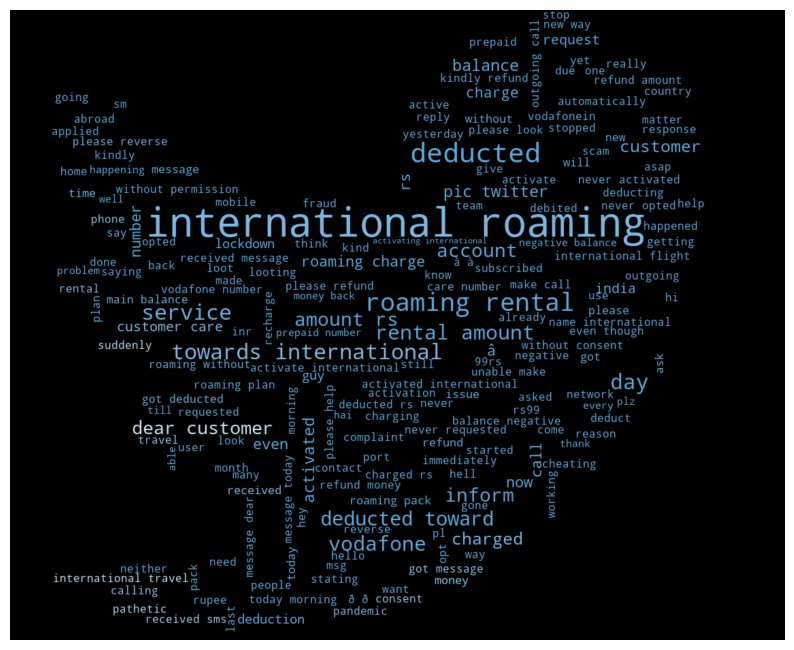

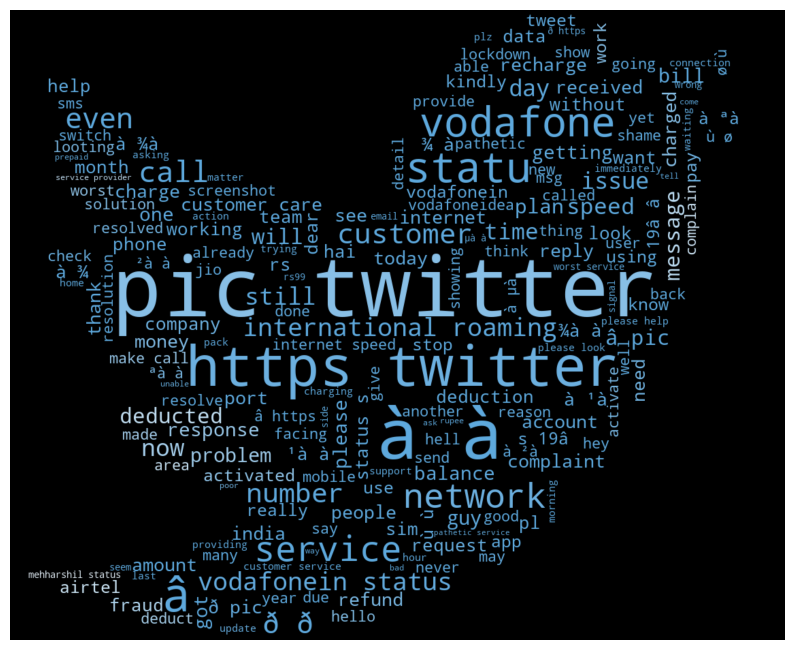

In [80]:
identify_topics(df, desc_matrix, 4)

4 is too less a number of clusters

Cluster
4    14074
2     3633
1     2438
3      585
0        1
5        1
Name: count, dtype: int64


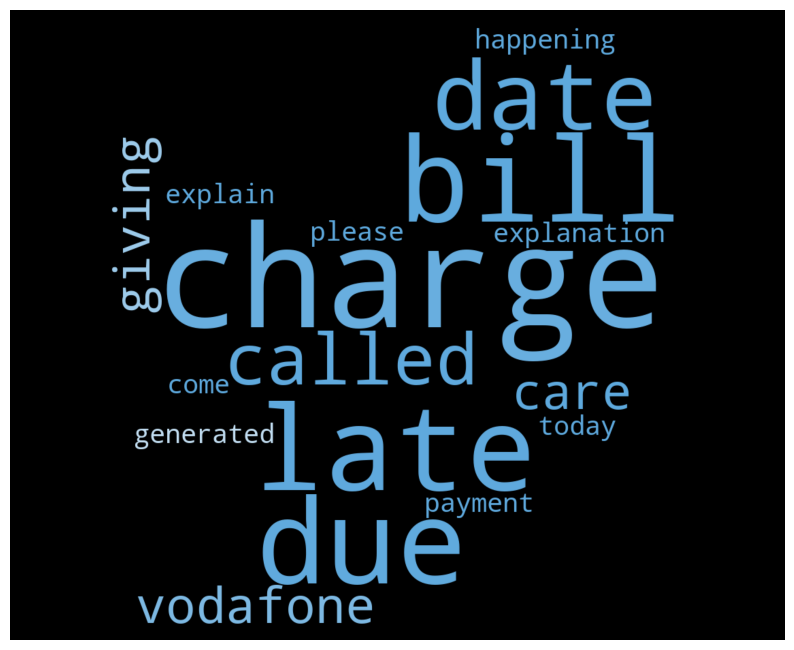

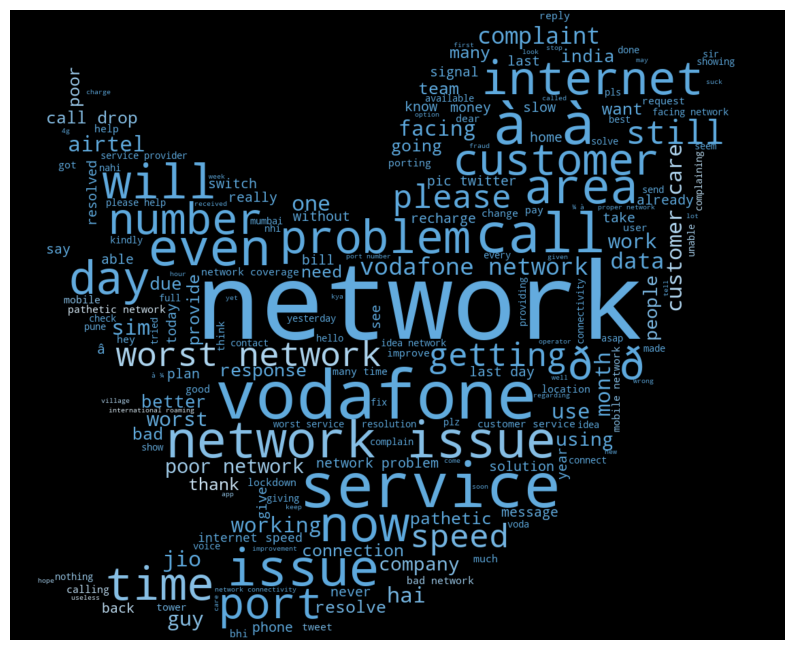

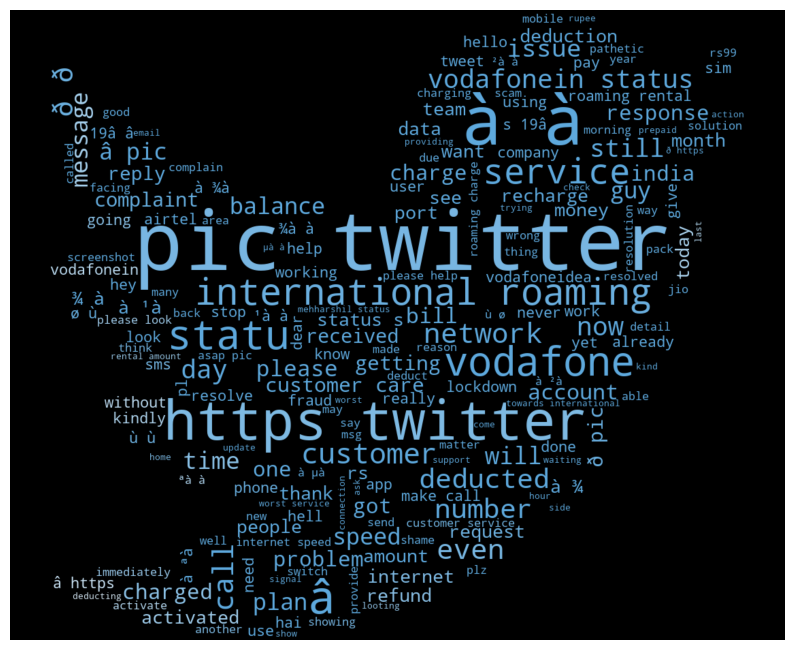

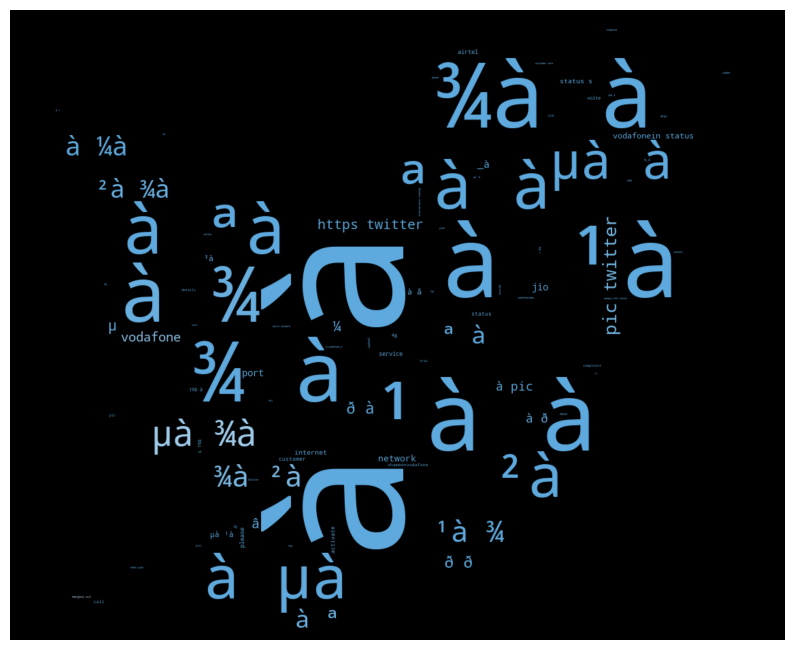

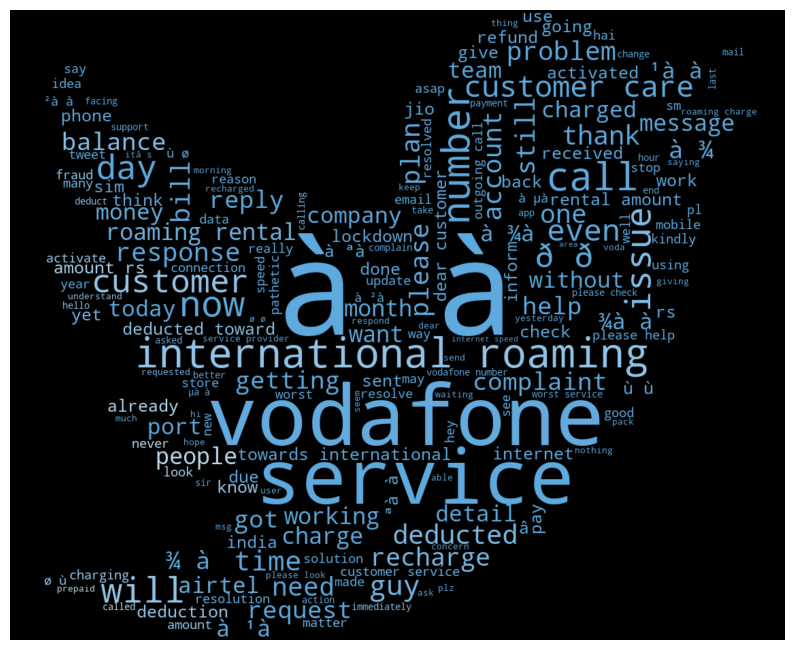

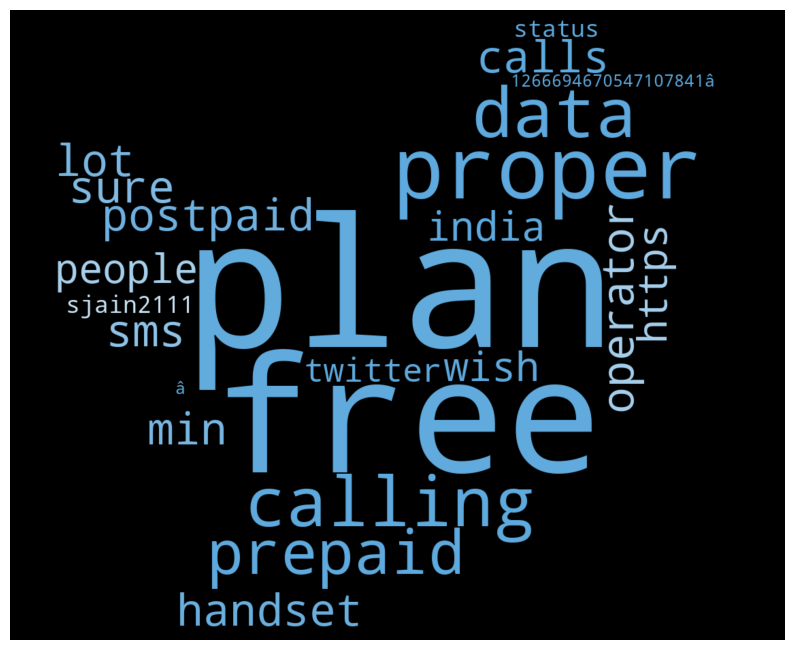

In [81]:
identify_topics(df, desc_matrix, 6)

6 seems like a good number of clusters

In [83]:
frame.to_csv('clustered_tweets.csv') 

In [87]:
frame.to_csv(r"C:\Users\Paul\Downloads\clustered_tweets.csv")